In [3]:
import numpy as np
from scipy import stats
# Графики
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)

# Центральная предельная теорема

Даже если исходная выборка не является нормально распределенной, если мы смоделируем несколько таких случайных выборок и возьмем средние, эти средние величины будут представлять собой **нормальное распределение**.
$$ \sqrt{n} \frac{\bar{X_n} - \mu}{\sigma} -> N(0,1)$$

Среднее значение из выборочных средних = 0.33462445229083776
Стандартное отклонение полученных средних = 0.0026322607499039644


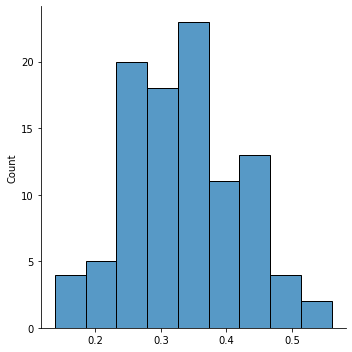

In [9]:
# Будем генерировать 1000 бета распределений и посмотрим на распределение средних
mean_list, n = [], 1000
for _ in range(n):
    beta = np.random.beta(a=10, b=20, size=100)
    mean_list.append(beta.mean())
sns.displot(beta);
print(f"Математическое ожидание бета-распределения: a / (a + b) = 0.33")
print(f"Среднее значение из выборочных средних = {np.mean(beta)}")
print(f"Стандартное отклонение полученных средних = {np.std(beta) / np.sqrt(n)}")


# Закон Больших Чисел
При достаточно большом количестве испытаний среднее значение случайной величины будет все ближе к своему теоретическому значению.
$$ P(|\bar{X_n} - \mu_n| <= \epsilon) -> 1 $$ $$n -> \infty$$

Пример: будем подбрасывать кубик и смотреть на среднее значение для разного количества испытаний.

In [ ]:
# Пять подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5)]))
# 50 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50)]))
# 500 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(500)]))
# 5000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5000)]))
# 50000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50000)]))

## PANDAS


Проверка гипотез используется в статистике для опровержения или
неопровержения некоторых предположений,
выдвигаемых исследователями. Поскольку на практике мы всегда имеем дело
с выборкой, а не с самой генеральной совокупностью данных,
полученные результаты на основании той или иной выборки могут быть неточны и не всегда воспроизводимы на других выборках.

Пример - социальные или медицинские исследования, которые при повторных испытания могут давать различные результаты. 

https://en.wikipedia.org/wiki/Replication_crisis

https://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970

https://statisticsbyjim.com/hypothesis-testing/reproducibility-p-values/

John P. A. Ioannidis - "Why Most Published Research Findings Are False", 2005

# Общая схема проверки гипотез на примере классического АБ-тестирования

Допустим, что мы хотим изменить дизайн сайта / приложения и посмотреть
экономический эффект от данных изменений. В простом эксперименте мы
пускаем юзеров по двум вариантам дизайна (первый - контрольный - вариант
без изменений; второй - тестовый - вариант с измененным дизайном).
В этой лекции мы не будем подробно останавливаться на том, как
правильно конструировать дизайн эксперимента, а разберем лишь теоретические
и практические моменты непосредственно тестирования. Про АБ-тесты подробно
можно почитать в презентации.

###  Общая схема проверки гипотез при АБ тестировании
1. Выдвигается нулевая гипотеза **$H_0$** (*эффекта от изменений нет* - разница
между средней конверсией/доходом статистически отлична от нуля)
и альтернативная гипотеза **$H_1$** (*эффект от изменения есть* -
есть существенная разница между средней конверсией / доходом)
2. Выбирается **уровень значимости** - вероятность ошибочно обнаружить
статистически значимый эффект, когда его на самом деле нет (как правило,
это 5% или 0.05 - в 5 случаях из 100 мы совершим эту ошибку)
3. На основании собранных данных вычисляем **статистику теста**, которая
при определенных предпосылках имеет некоторое **известное распределение**.
Для разных метрик мы используем разные статистики
4. Вычисляем **p-value** этой статистики (вероятность находиться в
центре распределения статистики теста). Если **p-value** превышает уровень значимости,
то у нас недостаточно оснований отклонить нулевую гипотезу (эффекта нет).
Следовательно, в этом случае новый вариант дизайна не приводит
к существенным экономическим изменениям

#### Ошибки первого и второго рода
Если уровень значимости - это ошибка первого рода (***вероятность найти
эффект, когда его на самом деле нет***), то ошибка второго рода -
это ***вероятность не найти эффект, когда он на самом деле есть).
Мощность теста определяется как 1 - ошибка второго рода.
Как правило, на тест фиксируют уровень значимости в 5% и мощность в 80%.

## Тесты проверки распределений на нормальность
    
Обширный список критериев согласия для проверки на нормальность представлен тут:
https://docviewer.yandex.ru/view/0/?page=16&*=ChdkZogunLp6fYDwqDsdvXyyJEV7InVybCI6InlhLWRpc2stcHVibGljOi8vNHJ3clVnVmRPYnNDaDNBYlFhSEZWNGFyVW9SeHpMS3pxSHlzemhNUnlOcz0iLCJ0aXRsZSI6ItC60YDQuNGC0LXRgNC40Lgg0L3QvtGA0LzQsNC70YzQvdC%2B0YHRgtC4INCy0YHQtS5wZGYiLCJub2lmcmFtZSI6ZmFsc2UsInVpZCI6IjAiLCJ0cyI6MTYwMjU3ODExMzMyOSwieXUiOiI1MjQ5ODg3NDYxNjAyNTAxNDY1In0%3D

Мы, в свою очередь, рассмотрим основные тесты на нормальность, использующиеся в повседневной статистике. 

### Тест Харке-Бера и Шапиро-Уилка
Эти тесты проверяют, является ли распределение случайной величины нормальным или нет.

Предположения: наблюдения в  выборке независимы и одинаково распределены (iid).

$H_0$: распределение нормальное

$H_a$: распределение не нормальное 

In [ ]:
# Тест Шапиро-Уилка
# Уровень значимости - 5%
alpha = 0.05
data = stats.norm.rvs(loc = 1, scale = 1, size = 10)

stat_shapiro, p_shapiro = stats.shapiro(data)
print('stat_shapiro=%.3f, p_shapiro=%.3f' % (stat_shapiro, p_shapiro))
if p_shapiro > alpha:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")

# Тест Харке-Бера
# Уровень значимости - 5%
alpha = 0.05
data = stats.norm.rvs(loc = 1, scale = 1, size = 10)

stat_jb, p_jb = stats.jarque_bera(data)
print('stat_jb=%.3f, p_jb=%.3f' % (stat_jb, p_jb))
if p_jb > alpha:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")


# Параметрические тесты

***Параметрические тесты используются в ситуации,
когда распределение одной или нескольких случайных величин распределено
по нормальному закону.***

## z-test для пропорций
В этом и последующем примере будем предполагать, что мы тестируем различные
варианты дизайна приложения. У нас есть контрольный вариант (без изменений) и
тестовый вариант (поменяли расположение кнопки "купить").

Этим тестом мы хотим проверить статистически значимое различия между
конверсиями для двух вариантов.

Статистика теста:

$Z_{stat} = \frac {p_1 - p_2} { \sqrt{p_1 (1 - p_1) / n_1 + p_2 (1 - p_2) / n_2} }$

Это число сравниваем с 1 - $\alpha / 2$ квантилем стандартного нормального распределения.
Если превышает, то отвергаем нулевую гипотезу и делаем вывод, что тестовый
вариант эксперимента лучше.
Способ через p-value. Вычисляем уровень p% квантиля $$Z_{stat}$ и сравниваем
с уровнем значимости. Если меньше, то нулевую гипотезу отвергаем.

## Тест Стьюдента о равенстве средних двух независимых выборок

Проверяет, существенно ли различаются средние значения для двух независимых выборок.
Подходит для АБ тестирования на финансовые метрики.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

$H_0$: средние равны

$H_1$: средние не равны

Статистика теста:

$$ t = \frac{\bar{x_1} - \bar{x_2}} {\sqrt{s^2_p * (1/n_1 + 1/n_2)}} $$

Дисперсия:

$$ s^2_p = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2} {n_1 + n_2 - 2}  $$

In [6]:
from scipy.stats import ttest_ind
data1 = np.random.normal(loc=1, scale=2, size=1000)
data2 = np.random.normal(loc=1.2, scale=3, size=1000)
# Указываем опцию, что дисперсии не равны - наиболее реалистичная предпосылка
stat, p = ttest_ind(data1, data2, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Средние равны')
else:
    print('Средние не равны')

stat=-2.034, p=0.042
Средние не равны


## Тест на равенство дисперсий двух независимых выборок

Проверяет, существенно ли различаются дисперсии значения для двух
независимых выборок.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: дисперсии равны

H1: дисперсии не равны

$$ F_{stat} = \frac{s_1}{s_2} $$

Критическое значение статистики ищем для такого числа степеней свободы:

$$ F_{crit}(1 - \alpha / 2, n_1-1, n_2-1) $$

In [10]:
F_stat = data1.std() / data2.std()
F_crit = stats.f.ppf(1 - 0.05/2, len(data1)-1, len(data2)-1)
print(F_stat > F_crit)


False


### Применение Хи-квадрат теста для анализа таблиц сопряженности

Таблица сопряжённости (таблица контингентности, факторная таблица) в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона. Часто применяют в медицине для тестирования работы препаратов.

Предпосылки:
- Наблюдения, использованные при расчете таблицы сопряженности, являются независимыми.
- В каждой ячейке таблицы содержится 25 и более наблюдений.

$H_0$: прививка не влияет на заболеваемость

$H_1$: прививка влияет на заболеваемость

#### Пример Хи-квадрат теста для таблиц сопряженности

Допустим, мы хотим узнать, помогает ли людям прививка от холеры. По столбцам таблицы обозначен факт болезни, по строкам - факт прививки.

| Прививался или нет \  Болел - Не болел| Не болел | Болел | Всего |
| --- | --- | --- | --- |
| Не прививался | 1022 | 11 | 1033|
| Прививался| 1625 | 5 | 1630 |
| Всего| 2647 | 16 | 2663 |


In [ ]:
from scipy.stats import chi2_contingency

table = [[1022, 11],[1625,  5]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не значимо отлична от нуля на 5% уровне')
else:
    print('Значимо отлична от нуля на 5% уровне')


# Непараметрические тесты
***Параметрические тесты, как правило, являются более мощными и могут 
проверить более широкий спектр альтернативных гипотез. 
Непараметрические тесты, в свою очередь, используются в ситуации, 
когда распределение одной или нескольких случайных величин 
не удовлетворяет необходимым предпосылкам. В таком случае применение 
параметрических тестов будет неверно методологически, 
что может привести к нашей известной проблеме 
"невоспроизводимости результатов" в будущем.***

### Тест Манна-Уитни о равенстве распределений двух независимых выборок

In [ ]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_mu, p_mu = mannwhitneyu(data1, data2)
sns.distplot(data1)
sns.distplot(data2)
print('stat=%.3f, p=%.3f' % (stat_mu, p_mu))
if p_mu > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Уилкоксона о равенстве распределений двух ПАРНЫХ выборок

In [ ]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_wil, p_wil = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat_wil, p_wil))
if p_wil > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Крускалла-Уолиса о равенстве распределений двух и более независимых выборок

In [ ]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_kru, p_kru = kruskal(data1, data2, data2 * 3, data1 * 4)
print('stat=%.3f, p=%.3f' % (stat_kru, p_kru))
if p_kru > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Фридмана о равенстве распределений двух и более ПАРНЫХ выборок

In [ ]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat_fri, p_fri = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat_fri, p_fri))
if p > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

# Множественное тестирование гипотез

До этого момента говорилось только о проверке статистических различий между 
*двумя вариантами*. Однако, бывают случаи, когда число альтернативных вариантов
существенно больше 2, либо же на одной и той же выборке мы тестируем несколько
гипотез подряд. 



# Метод Монте-Карло и бутстрап
***Наличие огромного количества статистических процедур при проверке гипотез 
с уже заранее известными распределениями статистик - это, конечно, хорошо. 
Однако, бывают ситуации, когда при тестировании гипотез распределение 
статистики заранее неизвестно. 
В этом случае приходит на помощь самостоятельное вычисление критических 
значений статистики при помощи моделирования большого количества выборок 
с приблизительно тем же набором наблюдений, что и исходная.***

## Метод Монте-Карло

Данный метод использует моделирование большого количества выборок из 
заданного распределения. При помощи данного метода проиллюстрируем проблему
множественного тестирования на практике.

In [ ]:
# Количество итераций
iterations_monte_carlo = 10000

## Бутстрап

Метод бутстрапа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.


In [ ]:
path_to_images = "/Users/iakubovskii/Machine_Learning/RANEPA/Data/"
Image(path_to_images + "bootstrap.jpg", width = 800)

Давайте построим доверительный интервал для среднего значения цены на квартиры в Бостоне.


In [ ]:
from sklearn.datasets import load_boston
price_boston = load_boston()['target']
price_boston[:5]

In [ ]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
boston_price_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(price_boston, 1000)]

#  выводим интервальную оценку среднего
print("Цена на квартиры в Бостоне:  90% доверительный интервал для среднего \n",  stat_intervals(boston_price_mean_scores, 0.05))